<a href="https://colab.research.google.com/github/Sanja2000/Task-6/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_fwf("brain_body.txt")

In [3]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


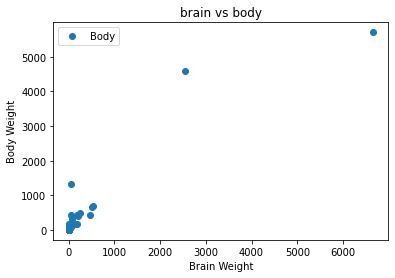

In [4]:
df.plot(x='Brain', y='Body', style='o')
plt.title("brain vs body")
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [5]:
df[['Brain', 'Body']].corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, 1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 83) 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
print(regressor.coef_)

[963.01428231]


In [10]:
print(regressor.intercept_)

310.1732653061224


In [11]:
y_pred = regressor.predict(x_test)
y_pred

array([ 96.80902964, 278.48587268, 127.08850348, 175.30422616,
        99.89483589,  96.7125982 ,  94.30181206, 595.74532789,
       292.95058949,  93.3837847 , 334.41611099,  93.80036855,
        94.69718099])

In [12]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
df

,Actual,predicted
49,21.00,96.809030
55,180.00,278.485873
35,56.00,127.088503
29,325.00,175.304226
34,179.00,99.894836
33,3.90,96.712598
12,6.60,94.301812
21,655.00,595.745328
28,406.00,292.950589
54,0.33,93.383785


In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('R squared Error:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 94.70292768449391
Mean Squared Error: 9747.63696607157
R squared Error: 0.7820038250325895
